Name: Afdal Bouraima
student number : 2304491

# **Import the libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras import Sequential,callbacks
from keras.layers import Input,Conv2D,Dense,MaxPooling2D,Dropout,Flatten
from matplotlib import pyplot as plt
from sklearn.model_selection import ParameterGrid
from keras.optimizers import RMSprop,Adam,Adagrad

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def NeuralNetwork(optimizer):
  #Construct our model
  model = Sequential()
  model.add(Input(shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),activation="sigmoid",padding="same"))
  model.add(Conv2D(64,(3,3),activation="sigmoid",padding="same"))
  model.add(MaxPooling2D((3,3)))
  model.add(Dropout(.5))
  model.add(Flatten())
  model.add(Dense(250,activation="sigmoid"))
  model.add(Dense(10,activation="softmax"))
  #We compile it
  model.compile(optimizer,
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
  # And we return it
  return model

In [3]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

#We normalize the input
train_images = train_images/255
test_images = test_images/255

#Transform the labels to categorial values
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

#validation data
x_validation = train_images[-2000:,:,:,:]
y_validation = train_labels[-2000:]

train_images = train_images[:-2000,:,:,:]
train_labels = train_labels[:-2000]

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
# the set of parameters i will tune
param_grid = {'learning_rate': [0.001, 0.01, 0.1],
              'momentum': [0.0, 0.2, 0.5, 0.9]}

# Initialize best parameters and corresponding performance metrics
best_params = None
best_val_acc = 0.0

In [5]:
#We iterate over parameter combinations
for params in ParameterGrid(param_grid):
    learning_rate = params['learning_rate']
    momentum = params['momentum']
    model = NeuralNetwork(keras.optimizers.SGD(learning_rate,momentum))
    history = model.fit(train_images,train_labels,batch_size=128,epochs=30,validation_data=(x_validation,y_validation))
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params = params

Epoch 1/30


2023-12-09 08:25:37.275274: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 11s 9ms/step - loss: 2.3330 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.1030
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3200 - accuracy: 0.1035 - val_loss: 2.3035 - val_accuracy: 0.1305
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3202 - accuracy: 0.1019 - val_loss: 2.3034 - val_accuracy: 0.1010
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3193 - accuracy: 0.1000 - val_loss: 2.3036 - val_accuracy: 0.1040
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3202 - accuracy: 0.0999 - val_loss: 2.3030 - val_accuracy: 0.1020
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3196 - accuracy: 0.1011 - val_loss: 2.3032 - val_accuracy: 0.1010
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3190 - accuracy: 0.1018 - val_loss: 2.3030 - val_accuracy: 0.0990
Epoch 8/30
375/3

2023-12-09 08:27:15.879706: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3461 - accuracy: 0.0998 - val_loss: 2.3066 - val_accuracy: 0.0860
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3204 - accuracy: 0.1009 - val_loss: 2.3045 - val_accuracy: 0.1005
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3208 - accuracy: 0.0993 - val_loss: 2.3049 - val_accuracy: 0.1005
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3186 - accuracy: 0.1001 - val_loss: 2.3051 - val_accuracy: 0.1005
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3190 - accuracy: 0.1007 - val_loss: 2.3059 - val_accuracy: 0.1005
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3185 - accuracy: 0.1003 - val_loss: 2.3040 - val_accuracy: 0.1005
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3186 - accuracy: 0.0987 - val_loss: 2.3064 - val_accuracy: 0.1005
Epoch 8/30
375/37

2023-12-09 08:29:40.299379: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 8ms/step - loss: 2.3238 - accuracy: 0.1001 - val_loss: 2.3039 - val_accuracy: 0.1005
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3212 - accuracy: 0.0999 - val_loss: 2.3037 - val_accuracy: 0.0860
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3201 - accuracy: 0.0991 - val_loss: 2.3039 - val_accuracy: 0.1010
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3201 - accuracy: 0.0981 - val_loss: 2.3036 - val_accuracy: 0.1005
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3195 - accuracy: 0.1000 - val_loss: 2.3024 - val_accuracy: 0.1455
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3185 - accuracy: 0.1009 - val_loss: 2.3019 - val_accuracy: 0.1005
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3184 - accuracy: 0.1011 - val_loss: 2.3038 - val_accuracy: 0.1215
Epoch 8/30
375/37

2023-12-09 08:31:12.549973: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3297 - accuracy: 0.0980 - val_loss: 2.3039 - val_accuracy: 0.1075
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3187 - accuracy: 0.1008 - val_loss: 2.3057 - val_accuracy: 0.1050
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3180 - accuracy: 0.0978 - val_loss: 2.3013 - val_accuracy: 0.1005
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3133 - accuracy: 0.1011 - val_loss: 2.3016 - val_accuracy: 0.1075
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3132 - accuracy: 0.1018 - val_loss: 2.3024 - val_accuracy: 0.0935
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3103 - accuracy: 0.1025 - val_loss: 2.3024 - val_accuracy: 0.1105
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3104 - accuracy: 0.1015 - val_loss: 2.3029 - val_accuracy: 0.1070
Epoch 8/30
375/37

2023-12-09 08:33:36.987843: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3260 - accuracy: 0.0989 - val_loss: 2.3098 - val_accuracy: 0.1010
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3207 - accuracy: 0.0997 - val_loss: 2.3067 - val_accuracy: 0.0935
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3173 - accuracy: 0.1014 - val_loss: 2.3061 - val_accuracy: 0.1010
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3164 - accuracy: 0.0990 - val_loss: 2.3088 - val_accuracy: 0.0935
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3132 - accuracy: 0.1016 - val_loss: 2.3039 - val_accuracy: 0.1020
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3113 - accuracy: 0.1021 - val_loss: 2.3087 - val_accuracy: 0.0935
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3105 - accuracy: 0.1029 - val_loss: 2.3050 - val_accuracy: 0.1005
Epoch 8/30
375/37

2023-12-09 08:35:11.674619: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3255 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.1050
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3208 - accuracy: 0.0996 - val_loss: 2.3063 - val_accuracy: 0.1075
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3166 - accuracy: 0.1029 - val_loss: 2.3035 - val_accuracy: 0.0990
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3143 - accuracy: 0.1018 - val_loss: 2.3069 - val_accuracy: 0.1050
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3130 - accuracy: 0.1001 - val_loss: 2.3041 - val_accuracy: 0.0935
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3105 - accuracy: 0.1030 - val_loss: 2.3015 - val_accuracy: 0.0985
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3099 - accuracy: 0.1014 - val_loss: 2.3035 - val_accuracy: 0.1020
Epoch 8/30
375/37

2023-12-09 08:36:47.380755: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_6/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3267 - accuracy: 0.1003 - val_loss: 2.3069 - val_accuracy: 0.1010
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3195 - accuracy: 0.1003 - val_loss: 2.3104 - val_accuracy: 0.1005
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3138 - accuracy: 0.1014 - val_loss: 2.3036 - val_accuracy: 0.0985
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3114 - accuracy: 0.1025 - val_loss: 2.3130 - val_accuracy: 0.0860
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3093 - accuracy: 0.1040 - val_loss: 2.3077 - val_accuracy: 0.0860
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3063 - accuracy: 0.1070 - val_loss: 2.2973 - val_accuracy: 0.1020
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3033 - accuracy: 0.1091 - val_loss: 2.2929 - val_accuracy: 0.1210
Epoch 8/30
375/37

2023-12-09 08:38:21.809124: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_7/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3278 - accuracy: 0.1006 - val_loss: 2.3040 - val_accuracy: 0.1070
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3096 - accuracy: 0.1037 - val_loss: 2.3069 - val_accuracy: 0.0990
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3013 - accuracy: 0.1112 - val_loss: 2.2795 - val_accuracy: 0.1830
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.1921 - accuracy: 0.1815 - val_loss: 2.0869 - val_accuracy: 0.2495
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.0551 - accuracy: 0.2508 - val_loss: 2.0164 - val_accuracy: 0.2770
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 1.9894 - accuracy: 0.2782 - val_loss: 1.9719 - val_accuracy: 0.2890
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 1.9230 - accuracy: 0.3094 - val_loss: 1.8819 - val_accuracy: 0.3395
Epoch 8/30
375/37

2023-12-09 08:39:55.605757: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3289 - accuracy: 0.1024 - val_loss: 2.3076 - val_accuracy: 0.0935
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3101 - accuracy: 0.0999 - val_loss: 2.3055 - val_accuracy: 0.0990
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3083 - accuracy: 0.1014 - val_loss: 2.3122 - val_accuracy: 0.0990
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3077 - accuracy: 0.1009 - val_loss: 2.3087 - val_accuracy: 0.1020
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3025 - accuracy: 0.1096 - val_loss: 2.3002 - val_accuracy: 0.1020
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.2412 - accuracy: 0.1528 - val_loss: 2.1215 - val_accuracy: 0.2570
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 2.0800 - accuracy: 0.2421 - val_loss: 2.0256 - val_accuracy: 0.2765
Epoch 8/30
375/37

2023-12-09 08:41:29.105239: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_9/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 10ms/step - loss: 2.3287 - accuracy: 0.1019 - val_loss: 2.3095 - val_accuracy: 0.0985
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3100 - accuracy: 0.0991 - val_loss: 2.3040 - val_accuracy: 0.1075
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3076 - accuracy: 0.1018 - val_loss: 2.3013 - val_accuracy: 0.1075
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.2903 - accuracy: 0.1199 - val_loss: 2.2325 - val_accuracy: 0.1750
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.1335 - accuracy: 0.2113 - val_loss: 2.0422 - val_accuracy: 0.2845
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.0109 - accuracy: 0.2738 - val_loss: 1.9906 - val_accuracy: 0.2990
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 1.9305 - accuracy: 0.3087 - val_loss: 1.8918 - val_accuracy: 0.3170
Epoch 8/30
375/3

2023-12-09 08:43:05.186434: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_10/dropout_10/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3222 - accuracy: 0.1030 - val_loss: 2.3045 - val_accuracy: 0.1005
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3041 - accuracy: 0.1040 - val_loss: 2.3001 - val_accuracy: 0.0945
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.2461 - accuracy: 0.1486 - val_loss: 2.0927 - val_accuracy: 0.2500
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.0313 - accuracy: 0.2614 - val_loss: 1.9766 - val_accuracy: 0.2895
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 1.9146 - accuracy: 0.3111 - val_loss: 1.8726 - val_accuracy: 0.3100
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 1.8077 - accuracy: 0.3502 - val_loss: 1.7545 - val_accuracy: 0.3635
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 1.7192 - accuracy: 0.3824 - val_loss: 1.7024 - val_accuracy: 0.3885
Epoch 8/30
375/37

2023-12-09 08:44:40.185503: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_11/dropout_11/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3212 - accuracy: 0.0994 - val_loss: 2.3086 - val_accuracy: 0.1005
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.2480 - accuracy: 0.1379 - val_loss: 2.0354 - val_accuracy: 0.2555
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 1.9255 - accuracy: 0.2989 - val_loss: 1.8096 - val_accuracy: 0.3480
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 1.7145 - accuracy: 0.3841 - val_loss: 1.6875 - val_accuracy: 0.3975
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 1.5853 - accuracy: 0.4313 - val_loss: 1.5136 - val_accuracy: 0.4575
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 1.5132 - accuracy: 0.4594 - val_loss: 1.4558 - val_accuracy: 0.4710
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 1.4622 - accuracy: 0.4789 - val_loss: 1.4018 - val_accuracy: 0.5000
Epoch 8/30
375/37

In [6]:
best_params

{'learning_rate': 0.1, 'momentum': 0.9}

In [7]:
def plot_results(history, activation_function, dataset):
    plt.figure(figsize=(12, 4))

    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{activation_function} Activation Function - {dataset}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{activation_function} Activation Function - {dataset}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/30


2023-12-09 08:48:10.601501: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_13/dropout_13/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3414 - accuracy: 0.0989 - val_loss: 2.3264 - val_accuracy: 0.0860
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3154 - accuracy: 0.1002 - val_loss: 2.3097 - val_accuracy: 0.1075
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.1694 - accuracy: 0.1862 - val_loss: 2.0324 - val_accuracy: 0.2485
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 1.8533 - accuracy: 0.3271 - val_loss: 1.7239 - val_accuracy: 0.3715
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 1.6690 - accuracy: 0.3954 - val_loss: 1.6048 - val_accuracy: 0.4115
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 1.5606 - accuracy: 0.4370 - val_loss: 1.4583 - val_accuracy: 0.4715
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 1.4844 - accuracy: 0.4646 - val_loss: 1.3738 - val_accuracy: 0.5155
Epoch 8/30
375/37

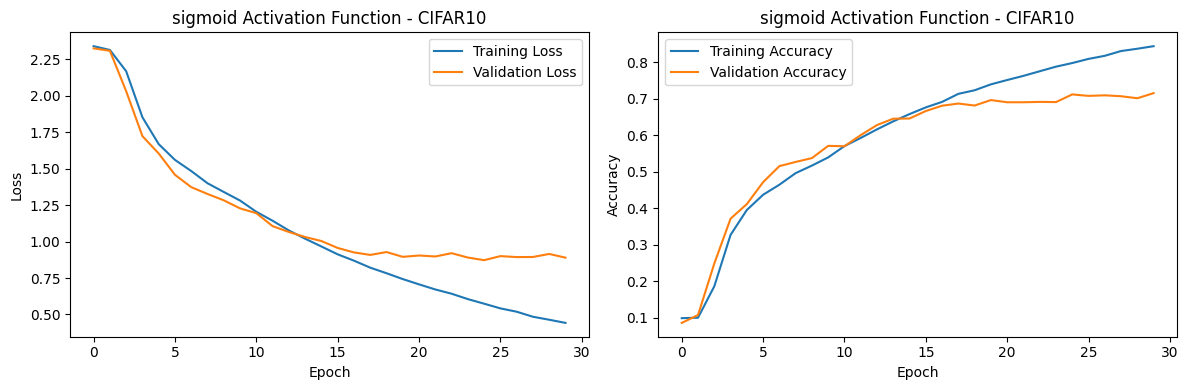

In [9]:
model = NeuralNetwork(keras.optimizers.SGD(best_params['learning_rate'],best_params['momentum']))
history = model.fit(train_images,train_labels,batch_size=128,epochs=30,validation_data=(x_validation,y_validation))
plot_results(history,"sigmoid","CIFAR10")

**The influence of tuning different set of parametters **: This allows us to compare some metrics and performance related to every parameter. We can then select the efficient one. 

## **RMS PROP**

In [10]:
best_val_acc = 0
for params in ParameterGrid(param_grid):
    learning_rate = params['learning_rate']
    momentum = params['momentum']
    model = NeuralNetwork(RMSprop(learning_rate,momentum=momentum))
    history = model.fit(train_images,train_labels,batch_size=128,epochs=10,validation_data=(x_validation,y_validation))
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_params = params

Epoch 1/10


2023-12-09 08:49:45.215529: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_14/dropout_14/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 9ms/step - loss: 2.3355 - accuracy: 0.1005 - val_loss: 2.3231 - val_accuracy: 0.1010
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2761 - accuracy: 0.1246 - val_loss: 2.0769 - val_accuracy: 0.2350
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 1.9603 - accuracy: 0.2924 - val_loss: 1.8881 - val_accuracy: 0.3280
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 1.8351 - accuracy: 0.3405 - val_loss: 1.7893 - val_accuracy: 0.3595
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 1.7591 - accuracy: 0.3687 - val_loss: 1.7336 - val_accuracy: 0.3705
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 1.6678 - accuracy: 0.4031 - val_loss: 1.6241 - val_accuracy: 0.4220
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 1.5952 - accuracy: 0.4288 - val_loss: 1.5282 - val_accuracy: 0.4505
Epoch 8/10
375/37

2023-12-09 08:50:19.091385: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_15/dropout_15/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 9ms/step - loss: 2.3476 - accuracy: 0.0989 - val_loss: 2.3094 - val_accuracy: 0.1010
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3127 - accuracy: 0.1005 - val_loss: 2.3092 - val_accuracy: 0.1050
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2918 - accuracy: 0.1162 - val_loss: 2.0970 - val_accuracy: 0.2415
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 1.9902 - accuracy: 0.2827 - val_loss: 1.9050 - val_accuracy: 0.3210
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 1.8157 - accuracy: 0.3484 - val_loss: 1.7498 - val_accuracy: 0.3875
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 1.6977 - accuracy: 0.3918 - val_loss: 1.6238 - val_accuracy: 0.4290
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 1.5972 - accuracy: 0.4296 - val_loss: 1.5194 - val_accuracy: 0.4625
Epoch 8/10
375/37

2023-12-09 08:51:02.676294: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_16/dropout_16/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 9ms/step - loss: 2.3550 - accuracy: 0.0983 - val_loss: 2.3149 - val_accuracy: 0.1075
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3175 - accuracy: 0.0999 - val_loss: 2.3058 - val_accuracy: 0.1010
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3173 - accuracy: 0.0996 - val_loss: 2.3095 - val_accuracy: 0.1010
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3174 - accuracy: 0.0989 - val_loss: 2.3067 - val_accuracy: 0.1010
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3181 - accuracy: 0.1000 - val_loss: 2.3079 - val_accuracy: 0.1050
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3174 - accuracy: 0.0996 - val_loss: 2.3142 - val_accuracy: 0.1020
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3013 - accuracy: 0.1093 - val_loss: 2.1841 - val_accuracy: 0.1830
Epoch 8/10
375/37

2023-12-09 08:51:36.796689: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_17/dropout_17/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 9ms/step - loss: 2.3830 - accuracy: 0.1013 - val_loss: 2.3309 - val_accuracy: 0.1010
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3518 - accuracy: 0.1016 - val_loss: 2.3363 - val_accuracy: 0.1070
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3487 - accuracy: 0.1012 - val_loss: 2.3525 - val_accuracy: 0.1075
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3513 - accuracy: 0.0987 - val_loss: 2.3738 - val_accuracy: 0.0860
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3514 - accuracy: 0.0989 - val_loss: 2.3129 - val_accuracy: 0.0990
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3525 - accuracy: 0.0962 - val_loss: 2.3528 - val_accuracy: 0.1050
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3516 - accuracy: 0.1019 - val_loss: 2.3439 - val_accuracy: 0.0990
Epoch 8/10
375/37

2023-12-09 08:52:10.906072: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_18/dropout_18/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.4904 - accuracy: 0.1008 - val_loss: 2.6658 - val_accuracy: 0.1075
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4667 - accuracy: 0.0985 - val_loss: 2.4256 - val_accuracy: 0.1020
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4636 - accuracy: 0.0993 - val_loss: 2.4080 - val_accuracy: 0.1010
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4642 - accuracy: 0.0996 - val_loss: 2.4387 - val_accuracy: 0.0935
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4629 - accuracy: 0.1009 - val_loss: 2.4380 - val_accuracy: 0.1020
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4616 - accuracy: 0.0994 - val_loss: 2.4714 - val_accuracy: 0.0860
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4629 - accuracy: 0.0996 - val_loss: 2.5877 - val_accuracy: 0.1010
Epoch 8/10
375/37

2023-12-09 08:52:44.257129: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_19/dropout_19/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.4858 - accuracy: 0.1024 - val_loss: 2.3622 - val_accuracy: 0.0990
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4551 - accuracy: 0.0999 - val_loss: 2.4471 - val_accuracy: 0.0935
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4575 - accuracy: 0.0969 - val_loss: 2.3951 - val_accuracy: 0.0935
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4549 - accuracy: 0.0980 - val_loss: 2.4271 - val_accuracy: 0.1020
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4530 - accuracy: 0.1003 - val_loss: 2.3823 - val_accuracy: 0.1020
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4543 - accuracy: 0.0979 - val_loss: 2.4357 - val_accuracy: 0.0860
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4523 - accuracy: 0.0983 - val_loss: 2.3583 - val_accuracy: 0.0935
Epoch 8/10
375/37

2023-12-09 08:53:17.605580: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_20/dropout_20/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 8ms/step - loss: 2.5292 - accuracy: 0.1006 - val_loss: 2.5673 - val_accuracy: 0.1070
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4826 - accuracy: 0.1020 - val_loss: 2.4792 - val_accuracy: 0.0860
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4898 - accuracy: 0.0997 - val_loss: 2.4550 - val_accuracy: 0.1075
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4884 - accuracy: 0.1011 - val_loss: 2.5131 - val_accuracy: 0.1075
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4759 - accuracy: 0.1006 - val_loss: 2.5513 - val_accuracy: 0.1050
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4816 - accuracy: 0.1010 - val_loss: 2.4991 - val_accuracy: 0.0935
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.4881 - accuracy: 0.0992 - val_loss: 2.4879 - val_accuracy: 0.0935
Epoch 8/10
375/37

2023-12-09 08:53:51.405100: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_21/dropout_21/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 9ms/step - loss: 2.9001 - accuracy: 0.0989 - val_loss: 2.5797 - val_accuracy: 0.0985
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6770 - accuracy: 0.0974 - val_loss: 2.4957 - val_accuracy: 0.1005
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6727 - accuracy: 0.0970 - val_loss: 2.8308 - val_accuracy: 0.0860
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6986 - accuracy: 0.0994 - val_loss: 2.9357 - val_accuracy: 0.1070
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.7347 - accuracy: 0.0993 - val_loss: 2.7602 - val_accuracy: 0.0860
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.6990 - accuracy: 0.0985 - val_loss: 2.5793 - val_accuracy: 0.1070
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.7068 - accuracy: 0.0990 - val_loss: 2.6252 - val_accuracy: 0.1020
Epoch 8/10
375/37

2023-12-09 08:54:25.365785: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_22/dropout_22/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 12.3353 - accuracy: 0.0990 - val_loss: 9.6663 - val_accuracy: 0.0860
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 11.8192 - accuracy: 0.0996 - val_loss: 12.5354 - val_accuracy: 0.1020
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 11.7908 - accuracy: 0.0989 - val_loss: 12.5386 - val_accuracy: 0.1020
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 11.7122 - accuracy: 0.1002 - val_loss: 10.9325 - val_accuracy: 0.1070
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 11.8595 - accuracy: 0.1004 - val_loss: 17.2554 - val_accuracy: 0.1050
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 11.8427 - accuracy: 0.1012 - val_loss: 15.0454 - val_accuracy: 0.1075
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 11.9008 - accuracy: 0.1033 - val_loss: 13.3071 - val_accuracy: 0.1005
Epoc

2023-12-09 08:54:59.261816: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_23/dropout_23/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 9ms/step - loss: 14.6056 - accuracy: 0.1003 - val_loss: 12.3354 - val_accuracy: 0.1075
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 13.4032 - accuracy: 0.1003 - val_loss: 14.7541 - val_accuracy: 0.1050
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 13.1867 - accuracy: 0.0988 - val_loss: 14.3240 - val_accuracy: 0.1050
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 13.5239 - accuracy: 0.1008 - val_loss: 18.5287 - val_accuracy: 0.0935
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 13.5456 - accuracy: 0.0997 - val_loss: 10.1175 - val_accuracy: 0.1010
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 13.2911 - accuracy: 0.1024 - val_loss: 13.6148 - val_accuracy: 0.1070
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 13.2683 - accuracy: 0.0972 - val_loss: 13.7814 - val_accuracy: 0.1020
Epo

2023-12-09 08:55:33.179270: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_24/dropout_24/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 20.9734 - accuracy: 0.0988 - val_loss: 24.6038 - val_accuracy: 0.0860
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 20.0243 - accuracy: 0.0989 - val_loss: 19.5934 - val_accuracy: 0.1075
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 19.5152 - accuracy: 0.1000 - val_loss: 12.8034 - val_accuracy: 0.1050
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 19.9845 - accuracy: 0.1024 - val_loss: 21.2048 - val_accuracy: 0.1010
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 19.9835 - accuracy: 0.1006 - val_loss: 26.8987 - val_accuracy: 0.0990
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 19.9579 - accuracy: 0.0983 - val_loss: 27.2663 - val_accuracy: 0.1005
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 19.8110 - accuracy: 0.1013 - val_loss: 10.1013 - val_accuracy: 0.1075
Epo

2023-12-09 08:56:06.961195: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_25/dropout_25/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 8ms/step - loss: 67.5894 - accuracy: 0.0986 - val_loss: 33.8994 - val_accuracy: 0.1050
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 61.9363 - accuracy: 0.1012 - val_loss: 31.7198 - val_accuracy: 0.0935
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 57.8916 - accuracy: 0.1003 - val_loss: 37.9057 - val_accuracy: 0.0935
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 57.5460 - accuracy: 0.1003 - val_loss: 52.9101 - val_accuracy: 0.1050
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 56.6678 - accuracy: 0.1021 - val_loss: 41.7542 - val_accuracy: 0.1050
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 58.0573 - accuracy: 0.1014 - val_loss: 42.7126 - val_accuracy: 0.1075
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 58.4272 - accuracy: 0.0981 - val_loss: 42.1782 - val_accuracy: 0.0860
Epo

Epoch 1/30


2023-12-09 08:56:51.574789: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_26/dropout_26/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 9ms/step - loss: 2.3576 - accuracy: 0.0981 - val_loss: 2.3114 - val_accuracy: 0.0990
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3129 - accuracy: 0.0991 - val_loss: 2.3147 - val_accuracy: 0.0990
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3123 - accuracy: 0.1010 - val_loss: 2.3056 - val_accuracy: 0.1050
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3120 - accuracy: 0.0983 - val_loss: 2.3198 - val_accuracy: 0.0985
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3124 - accuracy: 0.0986 - val_loss: 2.3081 - val_accuracy: 0.0990
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3127 - accuracy: 0.0986 - val_loss: 2.3146 - val_accuracy: 0.0860
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3124 - accuracy: 0.0999 - val_loss: 2.3071 - val_accuracy: 0.1050
Epoch 8/30
375/37

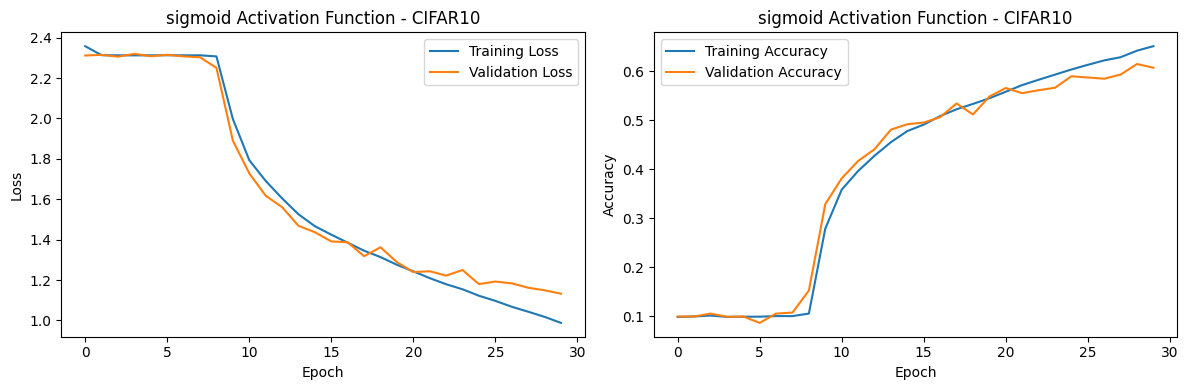

{'learning_rate': 0.001, 'momentum': 0.2}


In [11]:
model = NeuralNetwork(RMSprop(best_params['learning_rate'],momentum=best_params['momentum']))
history = model.fit(train_images,train_labels,batch_size=128,epochs=30,validation_data=(x_validation,y_validation))
plot_results(history,"sigmoid","CIFAR10")
print(best_params)

**Compared to SGD optimizer, the loss RMSprop does not start decrease directly, its start decreasing like 6 epochs after.And the model accuracy is lower than with SGD **

# **Adam**

In [12]:
best_learning_rate = 0 
best_val_acc=0
for learning_rate in param_grid["learning_rate"]:
    model = NeuralNetwork(Adam(learning_rate))
    history = model.fit(train_images,train_labels,batch_size=128,epochs=10,validation_data=(x_validation,y_validation))
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_learning_rate = learning_rate

Epoch 1/10


2023-12-09 08:58:27.171010: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_27/dropout_27/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 9ms/step - loss: 2.2917 - accuracy: 0.1311 - val_loss: 2.0594 - val_accuracy: 0.2335
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 1.9584 - accuracy: 0.2895 - val_loss: 1.8695 - val_accuracy: 0.3235
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 1.7783 - accuracy: 0.3651 - val_loss: 1.6951 - val_accuracy: 0.3915
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 1.6539 - accuracy: 0.4107 - val_loss: 1.5902 - val_accuracy: 0.4395
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 1.5666 - accuracy: 0.4421 - val_loss: 1.5159 - val_accuracy: 0.4640
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 1.5015 - accuracy: 0.4671 - val_loss: 1.4548 - val_accuracy: 0.4960
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 1.4486 - accuracy: 0.4831 - val_loss: 1.4169 - val_accuracy: 0.5005
Epoch 8/10
375/37

2023-12-09 08:59:01.445869: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_28/dropout_28/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 9ms/step - loss: 2.3721 - accuracy: 0.1013 - val_loss: 2.3951 - val_accuracy: 0.0985
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3534 - accuracy: 0.0972 - val_loss: 2.3336 - val_accuracy: 0.1075
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3503 - accuracy: 0.1003 - val_loss: 2.3868 - val_accuracy: 0.0990
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3503 - accuracy: 0.0976 - val_loss: 2.3759 - val_accuracy: 0.0985
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3502 - accuracy: 0.0990 - val_loss: 2.3259 - val_accuracy: 0.1075
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3514 - accuracy: 0.1008 - val_loss: 2.3643 - val_accuracy: 0.0990
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3598 - accuracy: 0.0988 - val_loss: 2.3294 - val_accuracy: 0.1070
Epoch 8/10
375/37

2023-12-09 08:59:35.415941: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_29/dropout_29/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 8ms/step - loss: 3.2110 - accuracy: 0.0994 - val_loss: 2.7863 - val_accuracy: 0.1020
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.9780 - accuracy: 0.1004 - val_loss: 2.8142 - val_accuracy: 0.0860
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.8089 - accuracy: 0.0990 - val_loss: 6.6375 - val_accuracy: 0.0990
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 3.1803 - accuracy: 0.0989 - val_loss: 3.1879 - val_accuracy: 0.0935
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.7093 - accuracy: 0.1012 - val_loss: 2.3617 - val_accuracy: 0.1010
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.9156 - accuracy: 0.1009 - val_loss: 2.6545 - val_accuracy: 0.1005
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.8267 - accuracy: 0.0986 - val_loss: 3.2209 - val_accuracy: 0.1050
Epoch 8/10
375/37

Epoch 1/30


2023-12-09 09:00:09.029675: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_30/dropout_30/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 8ms/step - loss: 2.3028 - accuracy: 0.1231 - val_loss: 2.0573 - val_accuracy: 0.2515
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 1.9538 - accuracy: 0.2947 - val_loss: 1.8554 - val_accuracy: 0.3345
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 1.7830 - accuracy: 0.3628 - val_loss: 1.7368 - val_accuracy: 0.3845
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 1.6770 - accuracy: 0.4056 - val_loss: 1.6446 - val_accuracy: 0.4200
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 1.5972 - accuracy: 0.4329 - val_loss: 1.5755 - val_accuracy: 0.4495
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 1.5316 - accuracy: 0.4551 - val_loss: 1.5080 - val_accuracy: 0.4745
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 1.4715 - accuracy: 0.4786 - val_loss: 1.4472 - val_accuracy: 0.4980
Epoch 8/30
375/37

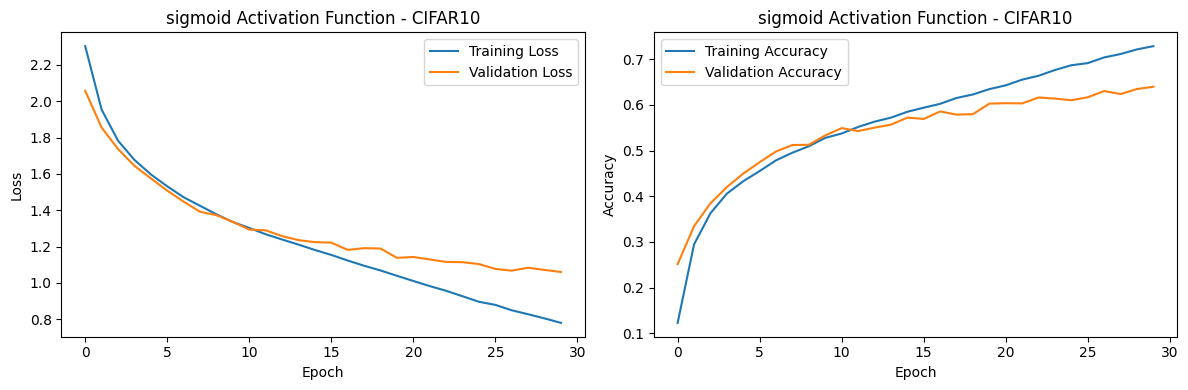

0.001


In [13]:
model = NeuralNetwork(Adam(best_learning_rate))
history = model.fit(train_images,train_labels,batch_size=128,epochs=30,validation_data=(x_validation,y_validation))
plot_results(history,"sigmoid","CIFAR10")
print(best_learning_rate)

**Here the cost function looks smoother than with SGD, the trainning accuracy is also smoother.**

 # **Adagrad**

In [14]:
best_learning_rate = 0 
best_val_acc=0
for learning_rate in param_grid["learning_rate"]:
    model = NeuralNetwork(Adagrad(learning_rate))
    history = model.fit(train_images,train_labels,batch_size=128,epochs=10,validation_data=(x_validation,y_validation))
    val_acc = max(history.history['val_accuracy'])
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_learning_rate = learning_rate

Epoch 1/10


2023-12-09 09:02:34.124102: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_31/dropout_31/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 5s 9ms/step - loss: 2.3312 - accuracy: 0.0971 - val_loss: 2.3040 - val_accuracy: 0.1005
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3194 - accuracy: 0.1002 - val_loss: 2.3041 - val_accuracy: 0.1005
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3177 - accuracy: 0.1016 - val_loss: 2.3045 - val_accuracy: 0.0860
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3178 - accuracy: 0.1040 - val_loss: 2.3029 - val_accuracy: 0.1005
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3162 - accuracy: 0.1002 - val_loss: 2.3024 - val_accuracy: 0.0990
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3171 - accuracy: 0.1007 - val_loss: 2.3029 - val_accuracy: 0.1095
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3148 - accuracy: 0.1002 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 8/10
375/37

2023-12-09 09:03:08.616090: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_32/dropout_32/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3286 - accuracy: 0.1023 - val_loss: 2.3066 - val_accuracy: 0.1050
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3154 - accuracy: 0.1031 - val_loss: 2.3034 - val_accuracy: 0.0990
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3103 - accuracy: 0.0990 - val_loss: 2.3017 - val_accuracy: 0.0990
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3070 - accuracy: 0.1035 - val_loss: 2.3013 - val_accuracy: 0.1140
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3047 - accuracy: 0.1043 - val_loss: 2.3015 - val_accuracy: 0.1465
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3031 - accuracy: 0.1070 - val_loss: 2.3016 - val_accuracy: 0.1390
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 2.2996 - accuracy: 0.1119 - val_loss: 2.2972 - val_accuracy: 0.1005
Epoch 8/10
375/37

2023-12-09 09:03:42.628802: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_33/dropout_33/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3342 - accuracy: 0.1008 - val_loss: 2.3125 - val_accuracy: 0.1020
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3085 - accuracy: 0.1001 - val_loss: 2.3031 - val_accuracy: 0.1075
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 2.3055 - accuracy: 0.1015 - val_loss: 2.3029 - val_accuracy: 0.0860
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 2.1718 - accuracy: 0.1918 - val_loss: 2.0036 - val_accuracy: 0.2920
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 1.9376 - accuracy: 0.3077 - val_loss: 1.8620 - val_accuracy: 0.3265
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 1.8082 - accuracy: 0.3496 - val_loss: 1.7833 - val_accuracy: 0.3575
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 1.7175 - accuracy: 0.3854 - val_loss: 1.6809 - val_accuracy: 0.3845
Epoch 8/10
375/37

Epoch 1/30


2023-12-09 09:04:16.184928: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_34/dropout_34/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


375/375 [==============================] - 4s 9ms/step - loss: 2.3325 - accuracy: 0.1029 - val_loss: 2.3135 - val_accuracy: 0.0860
Epoch 2/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3073 - accuracy: 0.0981 - val_loss: 2.3075 - val_accuracy: 0.0935
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3059 - accuracy: 0.1002 - val_loss: 2.3033 - val_accuracy: 0.1010
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3051 - accuracy: 0.1013 - val_loss: 2.3055 - val_accuracy: 0.0860
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3049 - accuracy: 0.1023 - val_loss: 2.3039 - val_accuracy: 0.1010
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 2.3017 - accuracy: 0.1059 - val_loss: 2.2822 - val_accuracy: 0.1000
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 2.1521 - accuracy: 0.1968 - val_loss: 2.0168 - val_accuracy: 0.2805
Epoch 8/30
375/37

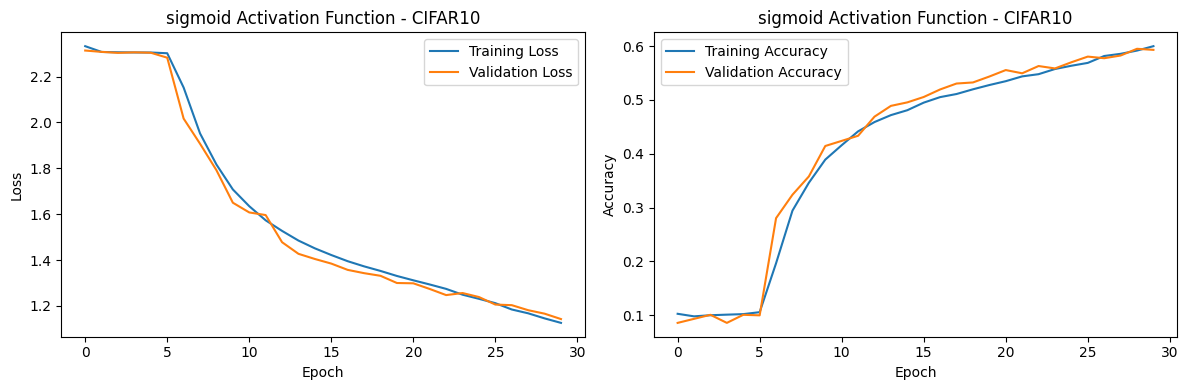

0.1


In [15]:
model = NeuralNetwork(Adagrad(best_learning_rate))
history = model.fit(train_images,train_labels,batch_size=128,epochs=30,validation_data=(x_validation,y_validation))
plot_results(history,"sigmoid","CIFAR10")
print(best_learning_rate)

**AdaGrad behave like RMSprop, but it takes less epochs to him to start decreasing the cost function.**

**By tuning the parameters for each optimizer,We can compare them all at the optimal performance. Then we can be sure to select the best optimizer for our case of study.** 